<a href="https://colab.research.google.com/github/KaikyLima/Faculdade/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [53]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


<Axes: xlabel='Age', ylabel='Count'>

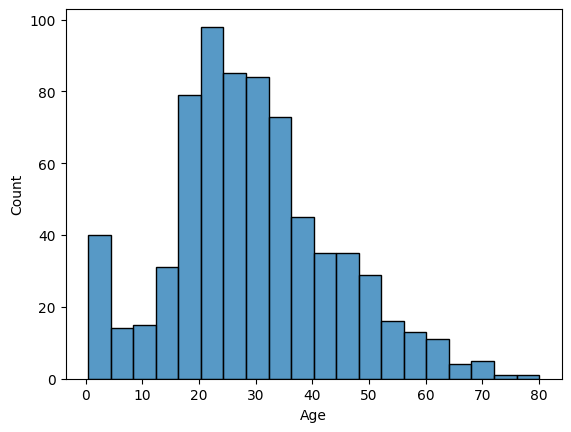

In [ ]:
sns.histplot(data=df_train, x="Age") # Plota um histograma da Idade


<Axes: xlabel='Sex', ylabel='count'>

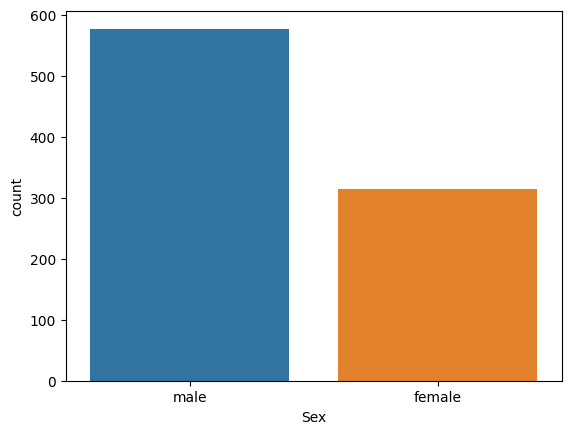

In [ ]:
sns.countplot(data=df_train, x="Sex") # Plota um gráfico de barras do sexo

<Axes: ylabel='Pclass'>

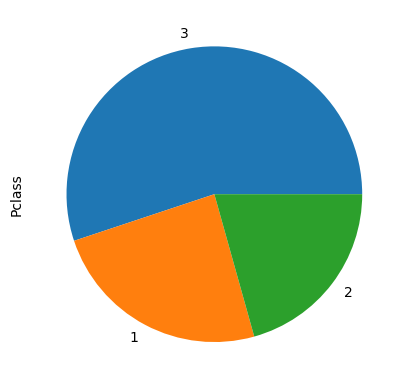

In [ ]:
df["Pclass"].value_counts().plot.pie() # Plota um gráfico de pizza da Classe social

<Axes: xlabel='Survived', ylabel='count'>

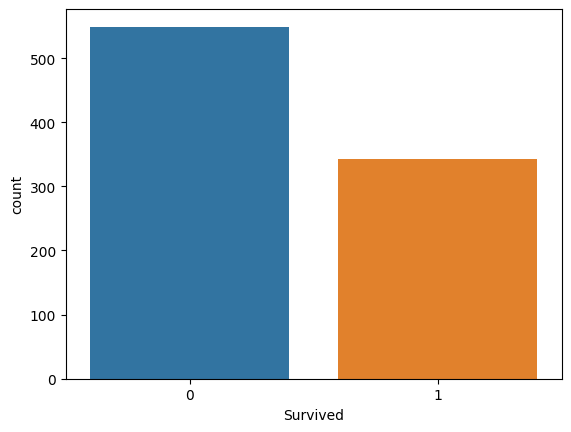

In [ ]:
sns.countplot(data=df_train, x="Survived") # Plota um gráfico de barras da Survived (0 é morto e 1 é vivo)

In [ ]:
sobrevivente = df_train[df_train['Survived'] == 1]

<Axes: xlabel='Pclass', ylabel='count'>

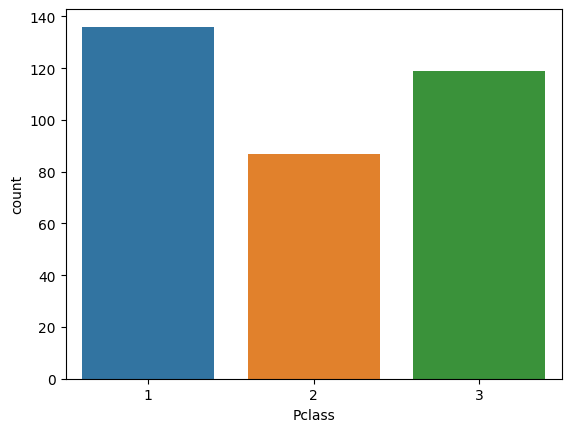

In [ ]:
sns.countplot(data=sobrevivente, x='Pclass')

<Axes: xlabel='Sex', ylabel='Survived'>

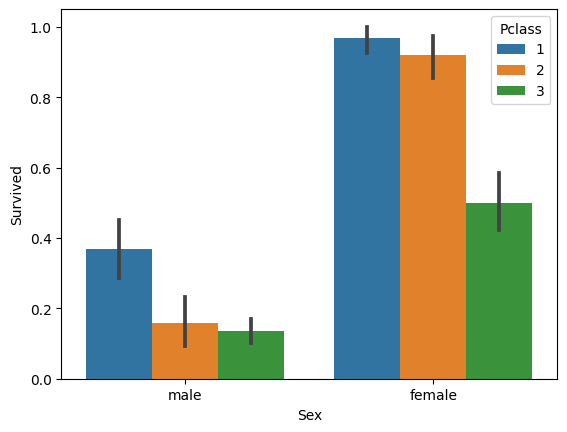

In [ ]:
sns.barplot(data=df_train, x="Sex", y="Survived", hue="Pclass") # Verifica a diferença de sobrevivencia entre homens e mulheres de diferentes classes sociais

In [ ]:
df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
contingency_table = pd.crosstab(df_train["Sex"], df_train["Survived"])

In [ ]:
df_train["Age"].mean() # Retorna a média da idade

29.69911764705882

In [ ]:
df[df["Survived"] == 1]["Age"].mean() # Retorna a média da idade dos que sobreviveram

28.549778121775027

In [ ]:
df[df["Survived"] == 0]["Age"].mean() # Retorna a média da idade dos que não sobreviveram

30.415099646415943

In [ ]:
df_train["Age"].isnull().sum()

177

In [ ]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [ ]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [54]:
x = df_train[['Age','Sex', 'Fare', 'Pclass']] #Separando as coulnas importantes
y = df_train['Survived']

In [55]:
x.loc[:, 'Sex'] = x['Sex'].map({'female': 0, 'male': 1}) #conversão, mulheres em 0 e homens em 1
x.loc[:, 'Age'] = x['Age'].fillna(x['Age'].mean()) #substitiu valores nulos pela média da coluna (idade)

<ipython-input-55-0e78f7f837a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, 'Sex'] = x['Sex'].map({'female': 0, 'male': 1}) #conversão, mulheres em 0 e homens em 1
<ipython-input-55-0e78f7f837a7>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:, 'Sex'] = x['Sex'].map({'female': 0, 'male': 1}) #conversão, mulheres em 0 e homens em 1
<ipython-input-55-0e78f7f837a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
regressao_linear = LogisticRegression()

In [58]:
regressao_linear.fit(x,y)

LogisticRegression()

In [59]:
y_pred = regressao_linear.predict(x)

In [60]:
df_train['Sobreviveu'] = y_pred

In [61]:
df_train[['PassengerId', 'Sobreviveu']]

,PassengerId,Sobreviveu
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,1
889,890,1


In [62]:
df_train['Sobreviveu'].value_counts()

0    567
1    324
Name: Sobreviveu, dtype: int64

In [46]:
accuracy = accuracy_score(y,y_pred) * 100
accuracy

78.33894500561168

In [63]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sobreviveu
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1
